In [2]:
#Script to obtain data 
# from helpers import *
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import joblib as jb
import pickle

#Libraries to create the multiclass model
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
#Import tensorflow and disable the v2 behavior and eager mode
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
tf.compat.v1.disable_v2_behavior()

#Library to validate the model
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score

Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
df = pd.read_csv("data/data_moods.csv")

In [4]:
col_features = df.columns[6:-3]
X= MinMaxScaler().fit_transform(df[col_features])
X2 = np.array(df[col_features])
Y = df['mood']

In [9]:
#Encodethe categories
encoder = LabelEncoder()
encoder.fit(Y)
encoded_y = encoder.transform(Y)


#Convert to  dummy (Not necessary in my case)
dummy_y = np_utils.to_categorical(encoded_y)

X_train,X_test,Y_train,Y_test = train_test_split(X,encoded_y,test_size=0.2,random_state=15)

X_train1,X_test1,Y_train1,Y_test1 = train_test_split(X,encoded_y,test_size=0.6,random_state=15)

target = pd.DataFrame({'mood':df['mood'].tolist(),'encode':encoded_y}).drop_duplicates().sort_values(['encode'],ascending=True)
target

,mood,encode
5,Calm,0
4,Energetic,1
0,Happy,2
1,Sad,3


In [21]:
def base_model():
    #Create the model
    model = Sequential()
    #Add 1 layer with 8 nodes,input of 4 dim with relu function
    model.add(Dense(8,input_dim=10,activation='relu'))
    #Add 1 layer with output 3 and softmax function
    model.add(Dense(4,activation='softmax'))
    #Compile the model using sigmoid loss function and adam optim
    model.compile(loss='categorical_crossentropy',optimizer='adam',
                 metrics=['accuracy'])
    return model

In [22]:
#Configure the model
estimator = KerasClassifier(build_fn=base_model,epochs=300,batch_size=200,verbose=0)

C:\Users\admin\AppData\Local\Temp\ipykernel_12000\2455418095.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasClassifier(build_fn=base_model,epochs=300,batch_size=200,verbose=0)


In [23]:
estimator.fit(X_train,Y_train)
y_preds = estimator.predict(X_test1)

c:\python\lib\site-packages\keras\engine\training_v1.py:2357: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


In [24]:
#Evaluate the model using KFold cross validation
kfold = KFold(n_splits=10,shuffle=True)
results = cross_val_score(estimator,X,encoded_y,cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100,results.std()*100))

c:\python\lib\site-packages\keras\engine\training_v1.py:2333: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Baseline: 79.88% (3.78%)


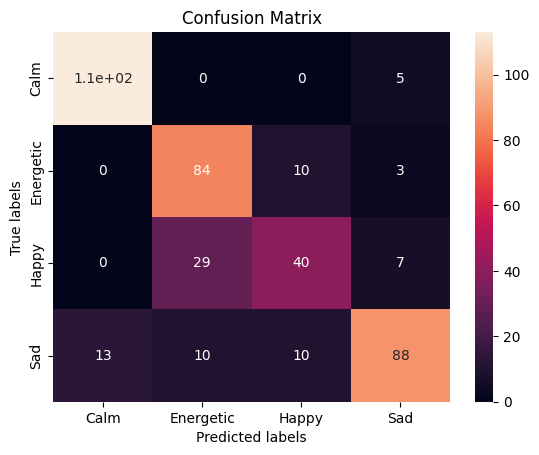

Accuracy Score 0.7888349514563107


In [25]:

cm = confusion_matrix(Y_test1,y_preds)
ax = plt.subplot()
sns.heatmap(cm,annot=True,ax=ax)

labels = target['mood']
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

print("Accuracy Score",accuracy_score(Y_test1,y_preds))

In [26]:
# def predict_mood(id_song):
#     #Join the model and the scaler in a Pipeline
#     pip = Pipeline([('minmaxscaler',MinMaxScaler()),('keras',KerasClassifier(build_fn=base_model,epochs=300,
#                                                                              batch_size=200,verbose=0))])
#     #Fit the Pipeline
#     pip.fit(X2,encoded_y)

#     #Obtain the features of the song
#     preds = get_songs_features(id_song)
#     #Pre-process the features to input the Model
#     preds_features = np.array(preds[0][6:-2]).reshape(-1,1).T

#     #Predict the features of the song
#     results = pip.predict(preds_features)

#     mood = np.array(target['mood'][target['encode']==int(results)])
#     name_song = preds[0][0]
#     artist = preds[0][2]

#     return print("{0} by {1} is a {2} song".format(name_song,artist,mood[0].upper()))
#     #print(f"{name_song} by {artist} is a {mood[0].upper()} song")
    

In [27]:
# predict_mood('0VjIjW4GlUZAMYd2vXMi3b')

In [28]:
from sklearn.metrics import mean_squared_error, r2_score

def calculate_mertrics(y_test,y_pred):
    print("aifbuaiuf")
    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    r2_scors = r2_score(y_test,y_pred)
    
    print("mse: ",mse)
    print("rmse: ",rmse)
    print("r2_score: ",r2_scors)

calculate_mertrics(Y_test1,y_preds)

aifbuaiuf
mse:  0.6553398058252428
rmse:  0.8095306083312989
r2_score:  0.5352140923220912
